

```
Assignment:  Logistic regression
```



In [1]:
# Uploading and reading the data
from google.colab import files
uploaded = files.upload()


Saving Titanic_test.csv to Titanic_test.csv
Saving Titanic_train.csv to Titanic_train.csv


In [2]:
import pandas as pd
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")


In [3]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (891, 12)
Test shape: (418, 11)


In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Now let create a Function for Preprocessing

def preprocess(df):
    df = df.copy()
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    return df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]


In [5]:
# Now let's apply the function
X_train_raw = preprocess(train_df)
y_train = train_df['Survived']
X_test_raw = preprocess(test_df)


In [6]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)


In [7]:
# Splitting Training Data for Evaluation

from sklearn.model_selection import train_test_split

X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)


In [8]:
# Training Logistic Regression on Split Data

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_split, y_train_split)
y_pred_val = logreg.predict(X_val)


In [9]:
# Evaluating on Validation Set

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


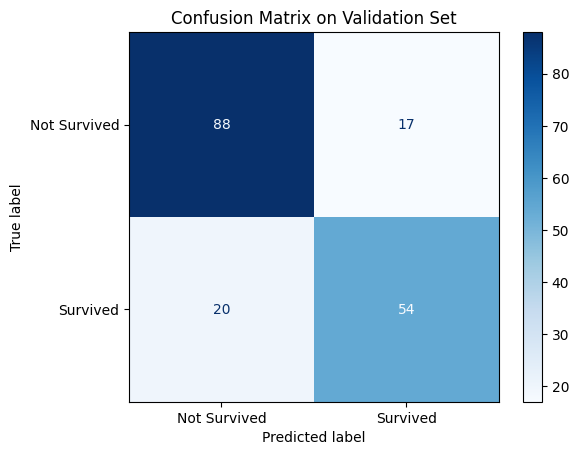

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix on Validation Set")
plt.show()


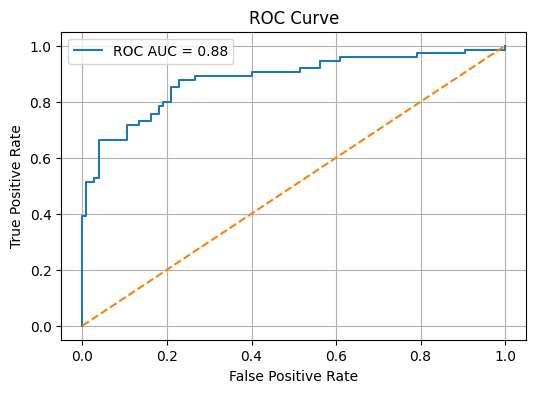

In [12]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_val, logreg.predict_proba(X_val)[:, 1])
roc_auc = roc_auc_score(y_val, logreg.predict_proba(X_val)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Classification Report
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_pred_val))


Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



In [14]:
# Retraining on Full Training Data for Final Model

logreg.fit(X_train_scaled, y_train)


LogisticRegression()

In [15]:
# Predicting on Test Data
y_pred_test = logreg.predict(X_test_scaled)
y_proba_test = logreg.predict_proba(X_test_scaled)[:, 1]


In [18]:
# Now let's Save the  Predictions in a csv

if 'PassengerId' in test_df.columns:
    submission = test_df[['PassengerId']].copy()
    submission['Survived'] = y_pred_test
    submission.to_csv('titanic_logreg_submission.csv', index=False)
    print("Submission file saved as 'titanic_logreg_submission.csv'")


Submission file saved as 'titanic_logreg_submission.csv'


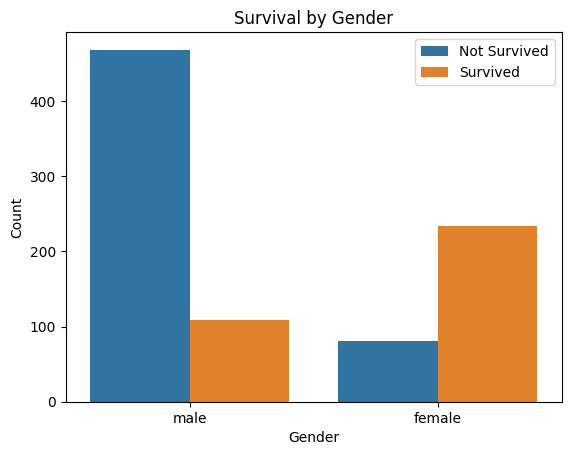

In [19]:
# Survival count by gender
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


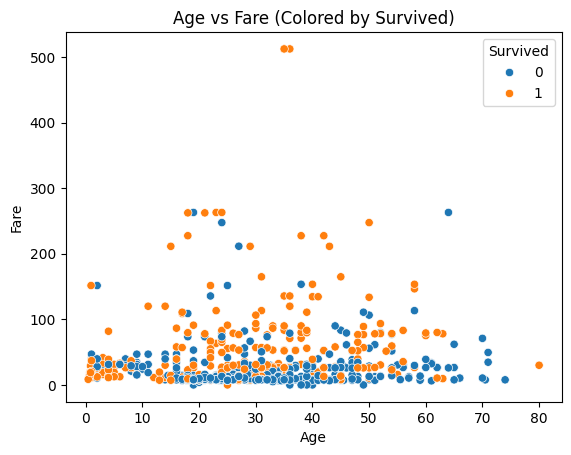

In [20]:
# Age vs Fare scatterplot
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df)
plt.title('Age vs Fare (Colored by Survived)')
plt.show()


Accuracy: The logistic regression model achieved an accuracy of approximately 79% on the validation set.

Precision & Recall:

For survivors (class 1), recall was 73% and precision was 76%, showing a reasonable ability to identify survivors.

For non-survivors (class 0), recall was higher at 84%, indicating the model is slightly biased toward predicting non-survival more confidently.

ROC AUC Score: The model achieved an ROC AUC score of ~0.84, indicating strong discriminatory power between the two classes.


# Insights from Exploratory Visualizations
Gender and Survival:

The count plot showed that females had a much higher survival rate than males.

Fare vs Age Scatter Plot:

Passengers who paid higher fares tended to have a higher survival rate.

Most survivors cluster in the younger and mid-aged range with mid-to-high fares.

#Model Training and Evaluation Strategy
The model was first evaluated using a hold-out validation split (80/20) on the training data to avoid overfitting.

After validation, the model was retrained on the full training set for final predictions on the test dataset.

# Strengths and Limitations

Strengths:
Simple and interpretable model.

Clean preprocessing with no data leakage.

Good baseline performance with minimal features.

Limitations:

Logistic regression may underfit the data compared to complex models (e.g., Random Forest, XGBoost).


